In [116]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [117]:
df = pd.read_csv("../Doan/data/raw/test_scores.csv")

In [118]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB


In [120]:
df.drop(columns=['student_id'], inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   gender           1984 non-null   object 
 7   lunch            1984 non-null   object 
 8   pretest          1984 non-null   float64
 9   posttest         1984 non-null   float64
dtypes: float64(3), object(7)
memory usage: 155.1+ KB


In [122]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1984,23,GOOBU,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_setting,1984,3,Urban,841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_type,1984,2,Public,1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classroom,1984,97,ZBH,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teaching_method,1984,2,Standard,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_student,1984.0,NaN,NaN,NaN,22.769153,4.248477,14.0,20.0,22.0,27.0,31.0
gender,1984,2,Male,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1984,2,Does not qualify,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pretest,1984.0,NaN,NaN,NaN,54.980847,13.558027,22.0,44.0,56.0,65.0,93.0
posttest,1984.0,NaN,NaN,NaN,67.125,13.93532,32.0,56.0,68.0,77.0,100.0


In [123]:
df.isnull().sum()

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64

In [124]:
df.school = pd.Categorical(df.school)
df = df.assign(school_code=df.school.cat.codes)

df.school_setting = pd.Categorical(df.school_setting)
df = df.assign(school_setting_code=df.school_setting.cat.codes)

df.school_type = pd.Categorical(df.school_type)
df = df.assign(school_type_code=df.school_type.cat.codes)

df.classroom = pd.Categorical(df.classroom)
df = df.assign(classroom_code=df.classroom.cat.codes)

df.teaching_method = pd.Categorical(df.teaching_method)
df = df.assign(teaching_metod_code=df.teaching_method.cat.codes)

df.gender = pd.Categorical(df.gender)
df = df.assign(gender_code=df.gender.cat.codes)

df.lunch = pd.Categorical(df.lunch)
df = df.assign(lunch_code=df.lunch.cat.codes)

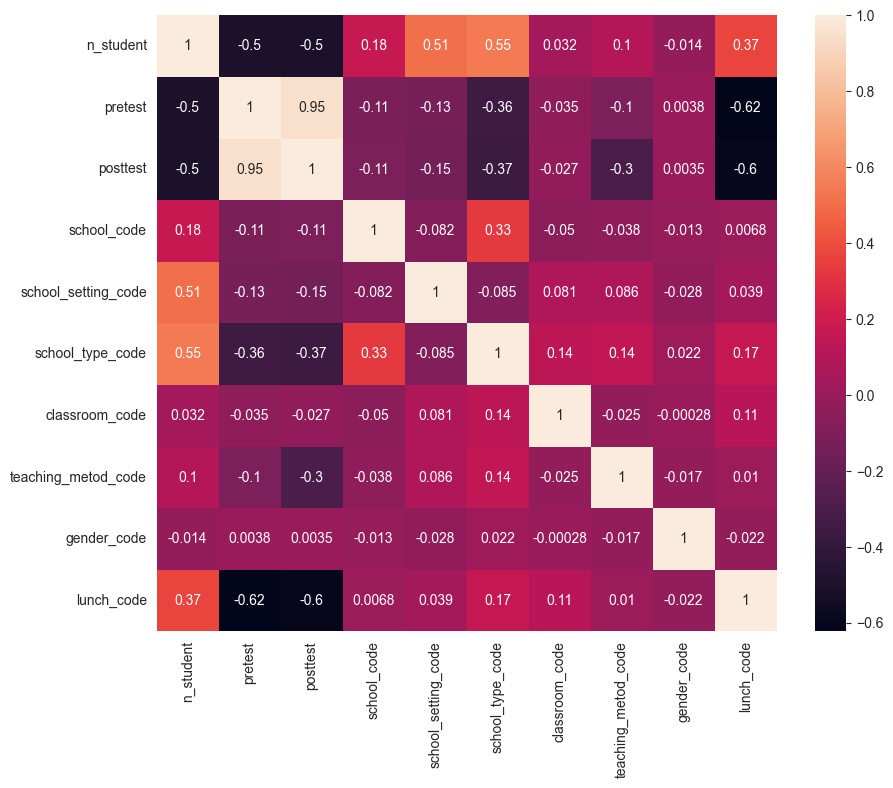

In [125]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sb.heatmap(corr,annot=True)
plt.show()

Insight:
- Можно наблюдать высокую корреляцию между послетестовами оценками (posttest) и количествами студентов (n_student) / оценками предварительного тестирования (pretest) / типами школы (school_type) / методами предподавания (teaching_method) / субсидируемами обед (lunch) / местоположением школы (school_setting)
- Можно наблюдать определенную положительную корреляцию кореляцию между:
    количествами студентов (n_student) и местоположением школы (school_setting) / типами школы (school_type) / субсидируемами обед (lunch)
    Оценкаими предварительного тестирования (pretest) и количествами студентов (n_student) / типами школы (school_type) / субсидируемами обед (lunch)
    названями школ (school) и типами школы (school_type)

school_type, school_setting, teaching_method, n_student, lunch, pretest

['Non-public', 'Public']
Categories (2, object): ['Non-public', 'Public']


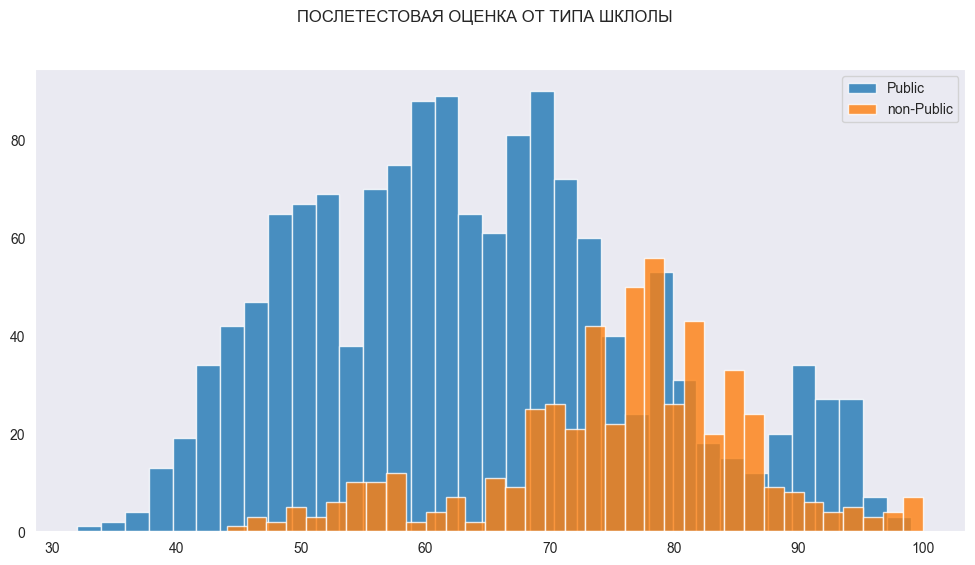

In [126]:
plt.figure(figsize=(12, 6))
type = df['school_type'].unique()
print(type)
nonPublic = df.loc[df['school_type'] == 'Non-public']
public = df.loc[df['school_type'] == 'Public']
plt.suptitle('ПОСЛЕТЕСТОВАЯ ОЦЕНКА ОТ ТИПА ШКЛОЛЫ')
plt.hist(public.posttest, bins=35, alpha=0.8, label='Public')
plt.hist(nonPublic.posttest, bins=35, alpha=0.8, label='non-Public')
plt.grid()
plt.legend()
plt.show()

Хотя учащиеся из общеобразовательных школ превосходят численностью, но имеют более низкие оценки чем учащиеся из частных школ

['Urban', 'Suburban', 'Rural']
Categories (3, object): ['Rural', 'Suburban', 'Urban']


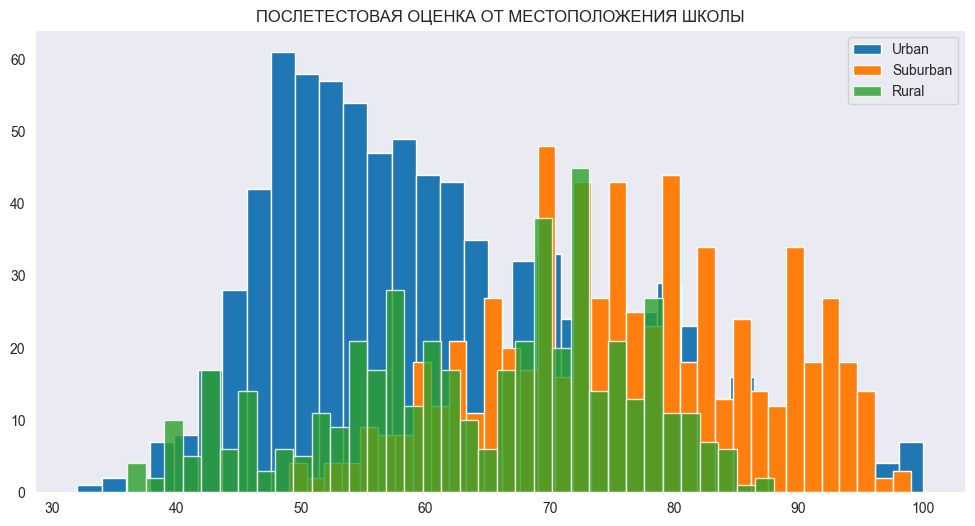

In [127]:
plt.figure(figsize=(12, 6))
school_settings = df['school_setting'].unique()
print(school_settings)
urban = df.loc[df['school_setting'] == 'Urban']
suburban = df.loc[df['school_setting'] == 'Suburban']
rural = df.loc[df['school_setting'] == 'Rural']
plt.title('ПОСЛЕТЕСТОВАЯ ОЦЕНКА ОТ МЕСТОПОЛОЖЕНИЯ ШКОЛЫ')
plt.hist(urban.posttest, bins=35, label='Urban')
plt.hist(suburban.posttest, bins=35, label='Suburban')
plt.hist(rural.posttest, bins=35, alpha=0.8, label='Rural')
plt.grid()
plt.legend()
plt.show()

['Standard', 'Experimental']
Categories (2, object): ['Experimental', 'Standard']


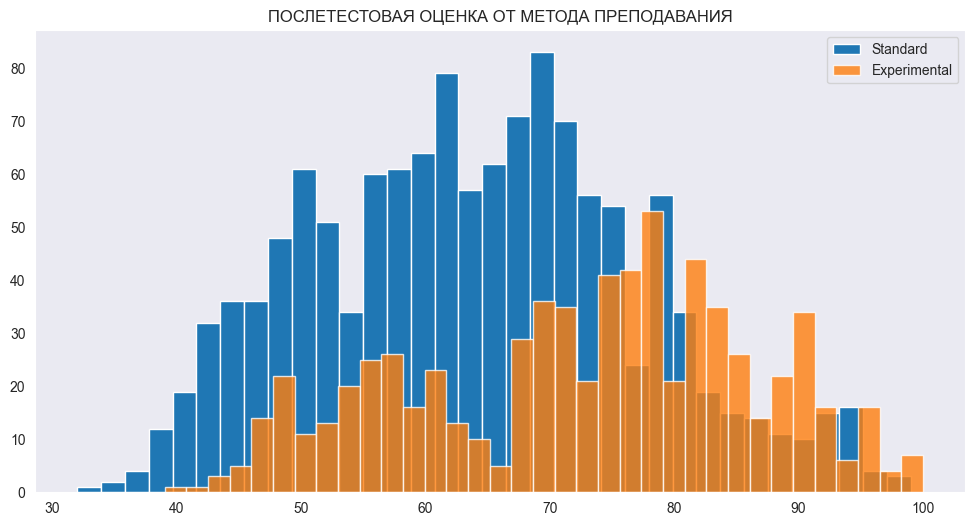

In [128]:
plt.figure(figsize=(12, 6))
lunch = df['teaching_method'].unique()
print(lunch)
standard = df.loc[df['teaching_method'] == 'Standard']
experimental = df.loc[df['teaching_method'] == 'Experimental']
plt.hist(standard.posttest, bins=35, label='Standard')
plt.hist(experimental.posttest, bins=35, alpha=0.8, label='Experimental')
plt.title('ПОСЛЕТЕСТОВАЯ ОЦЕНКА ОТ МЕТОДА ПРЕПОДАВАНИЯ')
plt.grid()
plt.legend()
plt.show()

Из данного графика можно сделать вывод, что ученики с экспериментальным видом обучения показывают немного лучшие результаты, однако это не так значительно

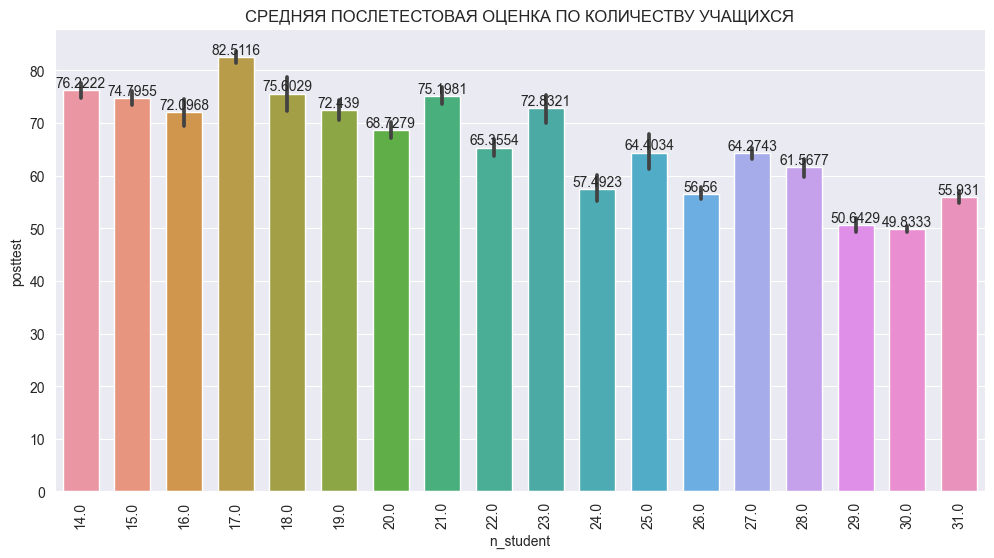

In [129]:
plt.figure(figsize=(12, 6))
ax = sb.barplot(x="n_student", y="posttest", data=df, width=0.7)
plt.xticks(rotation=90)
plt.title("СРЕДНЯЯ ПОСЛЕТЕСТОВАЯ ОЦЕНКА ПО КОЛИЧЕСТВУ УЧАЩИХСЯ")
for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Insight:
Как правило, чем меньше количество учащихся тем выше средний оценок

['Does not qualify', 'Qualifies for reduced/free lunch']
Categories (2, object): ['Does not qualify', 'Qualifies for reduced/free lunch']


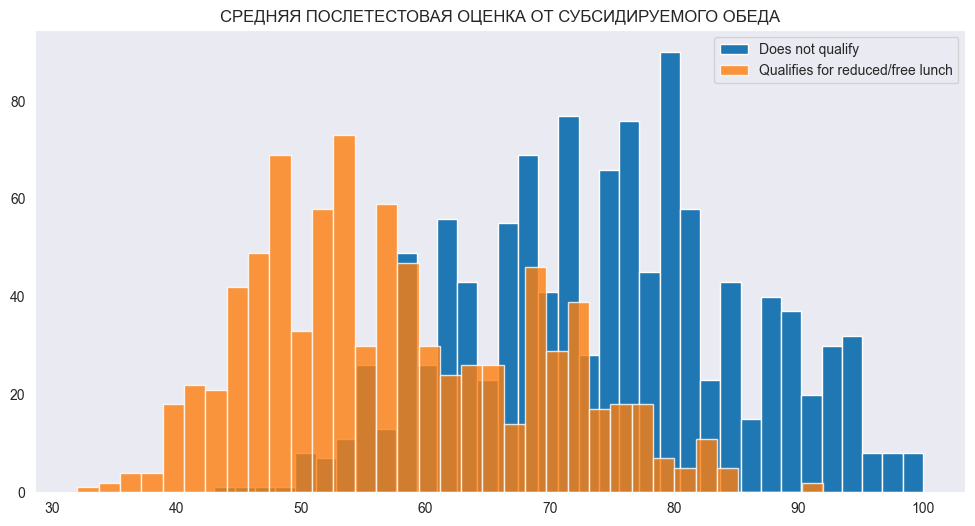

In [130]:
plt.figure(figsize=(12, 6))
lunch = df['lunch'].unique()
print(lunch)
qualify = df.loc[df['lunch'] == 'Does not qualify']
noQualify = df.loc[df['lunch'] == 'Qualifies for reduced/free lunch']
plt.title("СРЕДНЯЯ ПОСЛЕТЕСТОВАЯ ОЦЕНКА ОТ СУБСИДИРУЕМОГО ОБЕДА")
plt.hist(qualify.posttest, bins=35, label='Does not qualify')
plt.hist(noQualify.posttest, bins=35, alpha=0.8, label='Qualifies for reduced/free lunch')
plt.grid()
plt.legend()
plt.show()

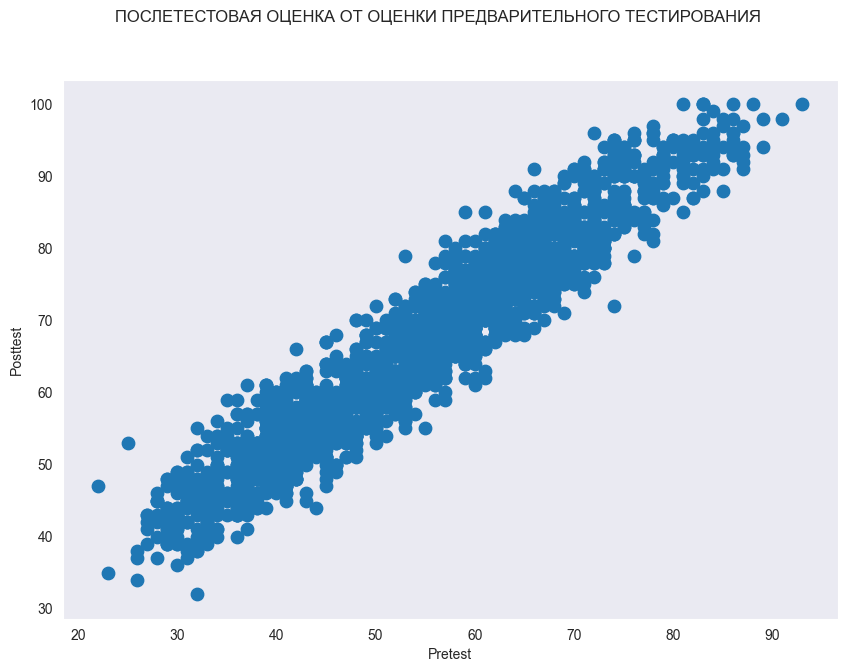

In [131]:
plt.figure(figsize=(10,7))
plt.scatter(df['pretest'], df['posttest'], s=80)
plt.xlabel('Pretest')
plt.ylabel('Posttest')
plt.suptitle('ПОСЛЕТЕСТОВАЯ ОЦЕНКА ОТ ОЦЕНКИ ПРЕДВАРИТЕЛЬНОГО ТЕСТИРОВАНИЯ')
plt.grid()
plt.show()